In [31]:
from boxoffice.db.frames import get_movie_frame_c, get_box_office_day_frame
import numpy as np

frame = get_movie_frame_c()
bodf = get_box_office_day_frame()

In [32]:
# print out the percentiles, every 5%
quantiles = frame['total_box_office'].quantile([i/20 for i in range(21)])

np.set_printoptions(suppress=True, precision=2)

print(quantiles)

# print the percent of the movies that made less than $1M
percent = 100 * len(frame[frame['total_box_office'] < 1_000_000]) / len(frame)
print(f'{percent:.2f}% of movies made less than $1M')

0.00    4.000000e+00
0.05    9.193500e+02
0.10    2.797700e+03
0.15    7.715800e+03
0.20    1.706940e+04
0.25    3.716900e+04
0.30    9.328690e+04
0.35    2.165653e+05
0.40    5.135722e+05
0.45    1.246583e+06
0.50    2.688207e+06
0.55    5.179313e+06
0.60    9.483750e+06
0.65    1.549245e+07
0.70    2.248807e+07
0.75    3.203075e+07
0.80    4.378891e+07
0.85    5.987951e+07
0.90    8.804197e+07
0.95    1.515099e+08
1.00    9.926427e+08
Name: total_box_office, dtype: float64
43.71% of movies made less than $1M


     index      id        date   revenue  theaters  movie  box_office  days
0     8260    8261  2024-07-25  38500000       0.0      1    38500000     0
1     8290    8291  2024-07-26  96189710    4210.0      1   134689710     1
2     8320    8321  2024-07-27  61644783    4210.0      1   196334493     2
3     8351    8352  2024-07-28  53600798    4210.0      1   249935291     3
4     8381    8382  2024-07-29  24427969    4210.0      1   274363260     4
..     ...     ...         ...       ...       ...    ...         ...   ...
57  261096  261097  2024-09-20   1005236    2450.0      1   662889861    57
58  261133  261134  2024-09-21   1792721    2450.0      1   664682582    58
59  261175  261176  2024-09-22   1021891    2450.0      1   665704473    59
60  261216  261217  2024-09-23    330543    2450.0      1   666035016    60
61  261253  261254  2024-09-24    415308    2450.0      1   666450324    61

[62 rows x 8 columns]


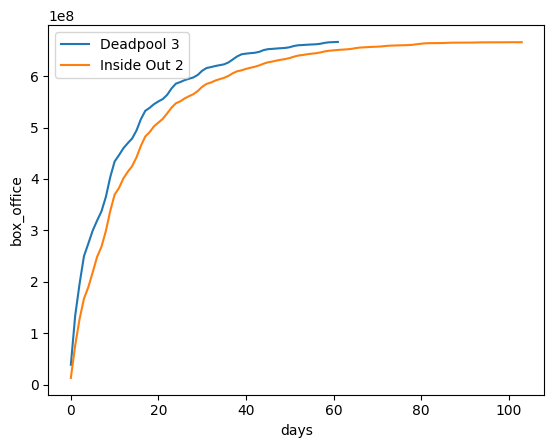

In [36]:
deadpool_id = 1
inside_out_id = 5

# filer the box office day frame to only include deadpool and inside out
deadpool = bodf[bodf['movie'] == deadpool_id]
inside_out = bodf[bodf['movie'] == inside_out_id]

# sort the data by day
deadpool = deadpool.sort_values('date')
inside_out = inside_out.sort_values('date')

# reset index
deadpool = deadpool.reset_index()
inside_out = inside_out.reset_index()

# calculate the cumulative box office
deadpool['box_office'] = deadpool['revenue'].cumsum()
inside_out['box_office'] = inside_out['revenue'].cumsum()

# double cumulative line plots, same y axis
import seaborn as sns

# x axis as number of days since release
deadpool['days'] = deadpool.index
inside_out['days'] = inside_out.index

sns.lineplot(x='days', y='box_office', data=deadpool, label='Deadpool 3')
sns.lineplot(x='days', y='box_office', data=inside_out, label='Inside Out 2')
